<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/TwoWay_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Python Modules**

In [1]:
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import pandas as pd
from scipy import stats
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

Two-way ANOVA
------------

**Example**

Aircraft primer paints are applied to aluminum surfaces by two methods: dipping and spraying. The purpose of the primer is to improve paint adhesion; some parts can be primed using either application method. An engineer interested in learning whether three different primers differ in their adhesion properties performed a factorial experiment to investigate the
effect of paint primer type and application method on paint adhesion. Three specimens were painted with each primer using each application method, a finish paint was applied, and the adhesion force was measured. The 18 runs from this experiment were run in random order.

AM = Application Method and PT = Primer Type

In [2]:
#FactorA = 3levels and FactorB = 2levels -> 3^2 = 9
df = pd.DataFrame({'AM': np.repeat(['Dipping', 'Spraying'], 9),
                   'PT': np.tile(np.repeat(['1', '2', '3'], 3), 2),
                   'force': [4.0, 4.5, 4.3,
                             5.6, 4.9, 5.4,
                             3.8, 3.7, 4.0,
                             5.4, 4.9, 5.6,
                             5.8, 6.1, 6.3,
                             5.5, 5.0, 5.0]})
#Display the dataframe
df

,AM,PT,force
0,Dipping,1,4.0
1,Dipping,1,4.5
2,Dipping,1,4.3
3,Dipping,2,5.6
4,Dipping,2,4.9
5,Dipping,2,5.4
6,Dipping,3,3.8
7,Dipping,3,3.7
8,Dipping,3,4.0
9,Spraying,1,5.4


**Perform two-way ANOVA**

In [3]:
model = ols('force ~ C(PT) + C(AM) + C(PT):C(AM)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(PT),4.581111,2.0,27.858108,0.000031
C(AM),4.908889,1.0,59.702703,0.000005
C(PT):C(AM),0.241111,2.0,1.466216,0.269342
Residual,0.986667,12.0,NaN,NaN


We can see the following p-values for each of the factors in the table:

PT: p-value = 0.000031

AM: p-value = 0.000005

PT*AM: p-value = 0.269342

Since the p-values for PT and AM are both less than .05, this means that both factors have a statistically significant effect on adhesion force.

And since the p-value for the interaction effect (0.269342) is not less than .05, this tells us that there is no significant interaction effect between Primer Type and Application Method.

**View Model Summary**

In [4]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  force   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     23.67
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           7.89e-06
Time:                        14:44:00   Log-Likelihood:                0.59326
No. Observations:                  18   AIC:                             10.81
Df Residuals:                      12   BIC:                             16.16
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Interaction Plot**

The interaction plot helps visualize the means of the response of the two factors Primer Type (PT) and Application Method (AM). Generally, the X-axis should have a factor with more levels. Roughly parallel factor lines indicate no interaction. For a more reliable conclusion of the interaction plot, it should be verified with the F-test for interaction.

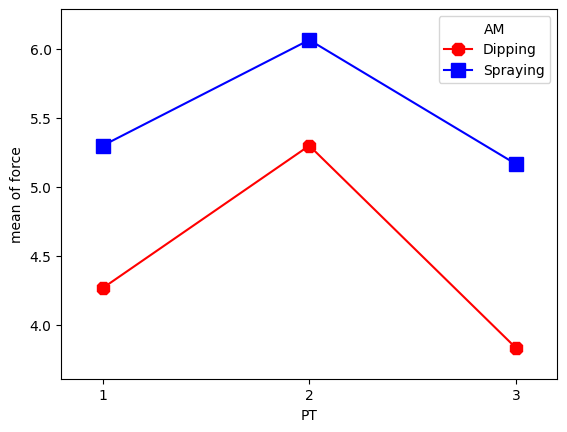

In [5]:
fig = interaction_plot(x= df.PT, trace = df.AM, response = df.force, colors=['red','blue'], markers=['8','s'], ms=10)

**Boxplot**

Generate a boxplot to see the data distribution by Primer Type (PT) and Application Method (AM). As there are 3 and 2 levels for PT and AM, respectively, this is a 3 x 2 factorial design yielding 6 unique combinations for measurement of the response variable. Using boxplot, we can easily detect the differences between different groups.

<Axes: xlabel='PT', ylabel='force'>

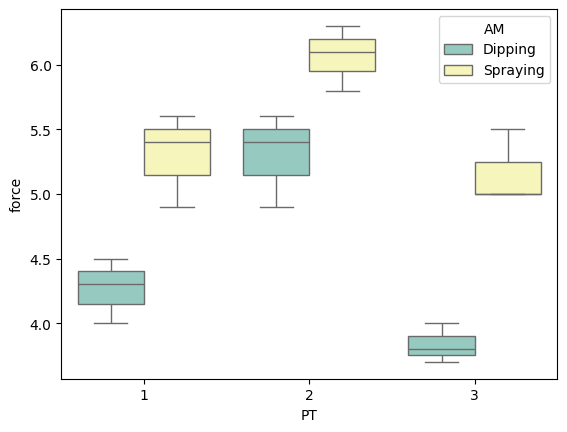

In [6]:
sns.boxplot(x="PT", y="force", hue="AM", data=df, palette="Set3")

<Axes: xlabel='AM', ylabel='force'>

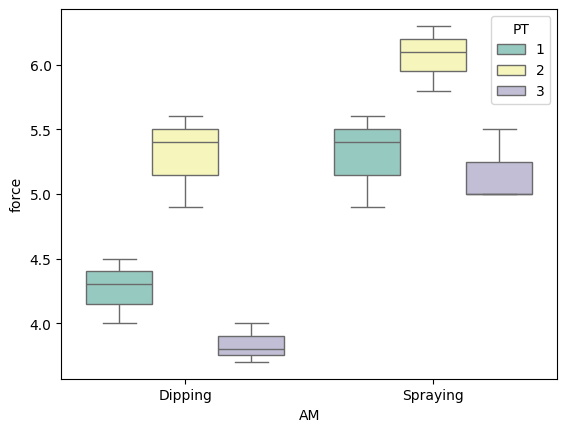

In [7]:
sns.boxplot(x="AM", y="force", hue="PT", data=df, palette="Set3")

**Residual Analysis**

0    -0.266667
1     0.233333
2     0.033333
3     0.300000
4    -0.400000
5     0.100000
6    -0.033333
7    -0.133333
8     0.166667
9     0.100000
10   -0.400000
11    0.300000
12   -0.266667
13    0.033333
14    0.233333
15    0.333333
16   -0.166667
17   -0.166667
dtype: float64


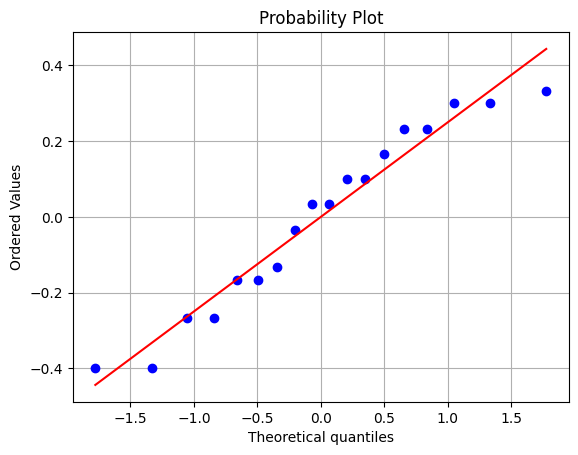

In [8]:
residuals = model.resid
print(residuals)

#Display normal probability plot
stats.probplot(residuals, plot=plt)
plt.grid(True)

**Residuals Plots**

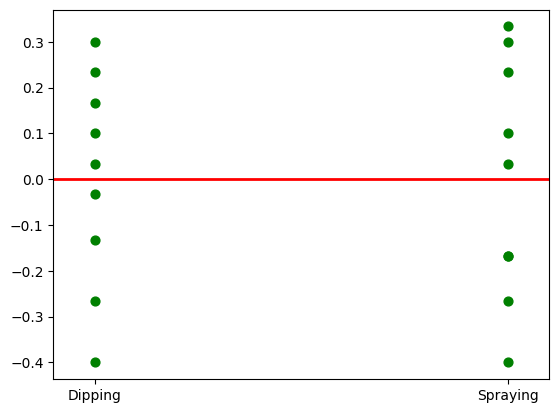

In [9]:
plt.scatter(df.AM, residuals, c='g', s = 40)
plt.hlines(y=0, xmin=-.1, xmax=1.1, colors ="r", linewidth=2)
plt.gca().set_xlim(left=-.1, right=1.1);

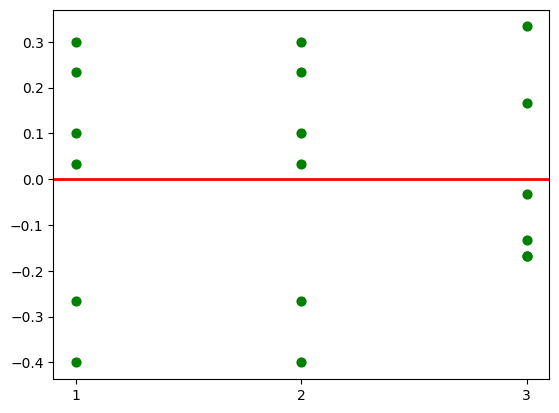

In [10]:
plt.scatter(df.PT, residuals, c='g', s = 40)
plt.hlines(y=0, xmin=-.1, xmax=2.1, colors ="r", linewidth=2)
plt.gca().set_xlim(left=-.1, right=2.1);